In [37]:
from sklearn_ubu.disturbing_neighbors import BaseDisturbingNeighbors
from sklearn_ubu.base_random_oracles import BaseRandomOracles
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

As with other classifiers, DisturbingNeighbors takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [38]:
seed = 0

X, y = make_multilabel_classification(
    n_samples=80, n_features=10, random_state=seed)

classifier = BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.5, train_size=0.5, random_state=seed)


As with other classifiers, RandomOracles takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [39]:
seed = 0

X, y = make_multilabel_classification(
        n_samples=50, n_features=10, random_state=seed)

classifier = BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, train_size=0.5, random_state=seed)


In [36]:
classifier_train = classifier.fit(X_train, y_train)

After being fitted, the model can then be used to predict the class of samples:

In [18]:
y_predict = classifier.predict(X_test)


Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [19]:
y_predict_proba = classifier.predict_proba(X_test)

dist = hamming_loss(y_test, y_predict)
print(dist)


0.4


Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

    conda install python-graphviz
 
The export_graphviz exporter also supports a variety of aesthetic options. Jupyter notebooks also render these plots inline automatically:

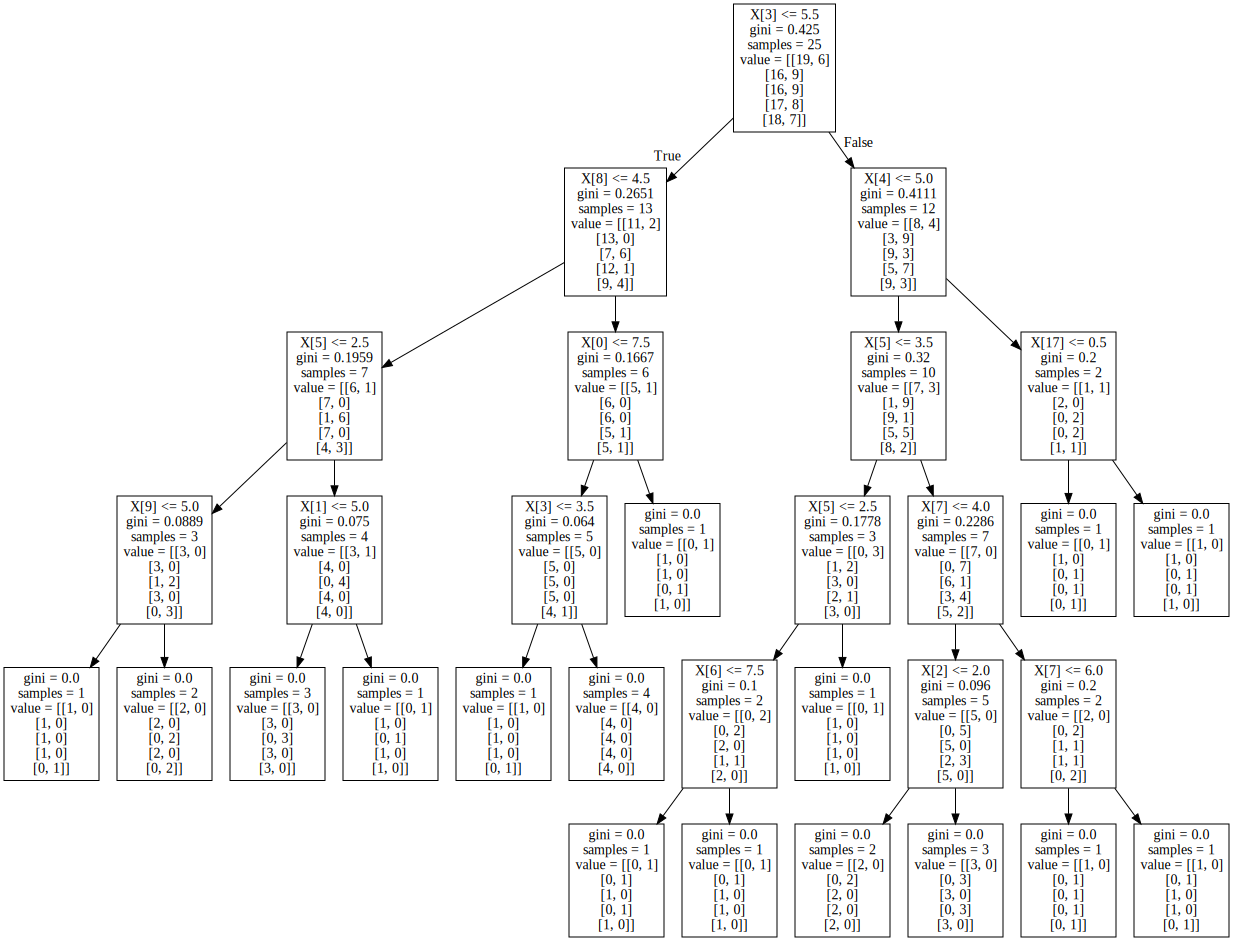

In [20]:
dot_data = export_graphviz(classifier_train, out_file=None)
graph = graphviz.Source(dot_data)
graph


Hacemos validación cruzada

In [21]:
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)


[ 0.   0.   0.   0.1  0.2]
